In [1]:
import math
import numpy as np
import random as rand
from numba import jit,int64,float64
import matplotlib.pyplot as plt
%matplotlib inline

#To increase cell width:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Color-blind friendly colors to plot:
CB_colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

#Running the script with parameter definitions and functions:
%run populations_functions.py

K = 1; 0.5*dg/dt = 1250.0
D = 50.0; 0.5*dg**2/dt = 500.00000000000006


In [46]:
#Setting noise and selection strength resp:
alphas_arr = np.array([0.5,1.5,4.5])
deltas_arr = np.array([0,1,5,25])

#Setting the sugar:
sug = 300
fit = fitness(g,sug,delta)
#Setting reg. peak:
g_reg = g[np.argmax(fit)]

#The initial distributions:
p0_unreg_alpha = np.zeros((len(alphas_arr),len(g)))
p0_reg_alpha = np.zeros((len(alphas_arr),len(g)))
p_unreg_alpha_delta = np.zeros((len(alphas_arr),len(deltas_arr),len(g)))
p_reg_alpha_delta = np.zeros((len(alphas_arr),len(deltas_arr),len(g)))

for alpha_idx in range(len(alphas_arr)):
    #Noise:
    alpha = alphas_arr[alpha_idx]
    #The initial unreg. dist:
    p0_unreg_alpha[alpha_idx] = Gaussian(g,g_peak,np.maximum(np.sqrt(alpha*g_peak),1))
    p0_unreg_alpha[alpha_idx] = p0_unreg_alpha[alpha_idx]/np.trapz(p0_unreg_alpha[alpha_idx],dx=dg)
    #The initial reg dist:
    p0_reg_alpha[alpha_idx] = Gaussian(g,g_reg,np.maximum(np.sqrt(alpha*g_reg),1))
    p0_reg_alpha[alpha_idx] = p0_reg_alpha[alpha_idx]/np.trapz(p0_reg_alpha[alpha_idx],dx=dg)
    for delta_idx in range(len(deltas_arr)):
        #The differential growth rate:
        delta = deltas_arr[delta_idx]
        p_unreg_alpha_delta[alpha_idx,delta_idx],p_reg_alpha_delta[alpha_idx,delta_idx] = selection(p0_unreg_alpha[alpha_idx],p0_reg_alpha[alpha_idx],sug,alpha,delta)

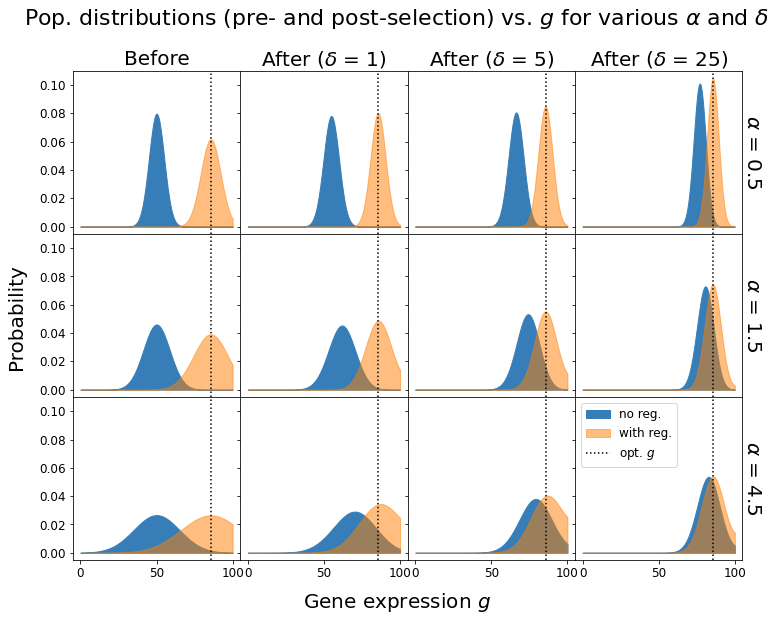

In [79]:
# fig,ax = plt.subplots(3,4,sharex=True,sharey=True,figsize=[12,9])

# ax[0,0].fill_between(g,y1=p0_unreg_alpha[0],y2=0,color=CB_colors[0])
# ax[0,0].fill_between(g,y1=p0_reg_alpha[0],y2=0,color=CB_colors[1],alpha=0.5)
# ax[0,0].axvline(g_reg,color='k',linestyle=':')
# ax[0,0].tick_params(axis='both', which='major', labelsize=12)
# ax[0,0].tick_params(axis='both', which='minor', labelsize=10)
# ax[0,0].set_title('Before',fontsize=20)

# ax[0,1].fill_between(g,y1=p_unreg_alpha_delta[0,0],y2=0,color=CB_colors[0])
# ax[0,1].fill_between(g,y1=p_reg_alpha_delta[0,0],y2=0,color=CB_colors[1],alpha=0.5)
# ax[0,1].axvline(g_reg,color='k',linestyle=':')
# ax[0,1].tick_params(axis='both', which='major', labelsize=12)
# ax[0,1].tick_params(axis='both', which='minor', labelsize=10)
# ax[0,1].set_title(r'After ($\delta$ = 1)',fontsize=20)

# # ax[0,2].fill_between(g,y1=p0_unreg_alpha[0],y2=0,color=CB_colors[0])
# # ax[0,2].fill_between(g,y1=p0_reg_alpha[0],y2=0,color=CB_colors[1],alpha=0.5)
# # ax[0,2].axvline(g_reg,color='k',linestyle=':')
# # ax[0,2].tick_params(axis='both', which='major', labelsize=12)
# # ax[0,2].tick_params(axis='both', which='minor', labelsize=10)
# # ax[0,2].set_title('Before',fontsize=20)

# ax[0,2].fill_between(g,y1=p_unreg_alpha_delta[0,1],y2=0,color=CB_colors[0])
# ax[0,2].fill_between(g,y1=p_reg_alpha_delta[0,1],y2=0,color=CB_colors[1],alpha=0.5)
# ax[0,2].axvline(g_reg,color='k',linestyle=':')
# ax[0,2].tick_params(axis='both', which='major', labelsize=12)
# ax[0,2].tick_params(axis='both', which='minor', labelsize=10)
# ax[0,2].set_title(r'After ($\delta$ = 5)',fontsize=20)

# # ax[0,4].fill_between(g,y1=p0_unreg_alpha[0],y2=0,color=CB_colors[0])
# # ax[0,4].fill_between(g,y1=p0_reg_alpha[0],y2=0,color=CB_colors[1],alpha=0.5)
# # ax[0,4].axvline(g_reg,color='k',linestyle=':')
# # ax[0,4].tick_params(axis='both', which='major', labelsize=12)
# # ax[0,4].tick_params(axis='both', which='minor', labelsize=10)
# # ax[0,4].set_title('Before',fontsize=20)

# ax[0,3].fill_between(g,y1=p_unreg_alpha_delta[0,2],y2=0,color=CB_colors[0])
# ax[0,3].fill_between(g,y1=p_reg_alpha_delta[0,2],y2=0,color=CB_colors[1],alpha=0.5)
# ax[0,3].axvline(g_reg,color='k',linestyle=':')
# ax[0,3].tick_params(axis='both', which='major', labelsize=12)
# ax[0,3].tick_params(axis='both', which='minor', labelsize=10)
# ax[0,3].set_title(r'After ($\delta$ = 25)',fontsize=20)
# ax[0,3].text(1.06,0.5,r'$\alpha$ = 0.5',va='center',ha='center',rotation=270,transform=ax[0,3].transAxes,fontsize=20)

# ax[1,0].fill_between(g,y1=p0_unreg_alpha[1],y2=0,color=CB_colors[0])
# ax[1,0].fill_between(g,y1=p0_reg_alpha[1],y2=0,color=CB_colors[1],alpha=0.5)
# ax[1,0].tick_params(axis='both', which='major', labelsize=12)
# ax[1,0].tick_params(axis='both', which='minor', labelsize=10)
# ax[1,0].axvline(g_reg,color='k',linestyle=':')

# ax[1,1].fill_between(g,y1=p_unreg_alpha_delta[1,0],y2=0,color=CB_colors[0])
# ax[1,1].fill_between(g,y1=p_reg_alpha_delta[1,0],y2=0,color=CB_colors[1],alpha=0.5)
# ax[1,1].tick_params(axis='both', which='major', labelsize=12)
# ax[1,1].tick_params(axis='both', which='minor', labelsize=10)
# ax[1,1].axvline(g_reg,color='k',linestyle=':')

# # ax[1,2].fill_between(g,y1=p0_unreg_alpha[1],y2=0,color=CB_colors[0])
# # ax[1,2].fill_between(g,y1=p0_reg_alpha[1],y2=0,color=CB_colors[1],alpha=0.5)
# # ax[1,2].axvline(g_reg,color='k',linestyle=':')

# ax[1,2].fill_between(g,y1=p_unreg_alpha_delta[1,1],y2=0,color=CB_colors[0])
# ax[1,2].fill_between(g,y1=p_reg_alpha_delta[1,1],y2=0,color=CB_colors[1],alpha=0.5)
# ax[1,2].tick_params(axis='both', which='major', labelsize=12)
# ax[1,2].tick_params(axis='both', which='minor', labelsize=10)
# ax[1,2].axvline(g_reg,color='k',linestyle=':')

# # ax[1,4].fill_between(g,y1=p0_unreg_alpha[1],y2=0,color=CB_colors[0])
# # ax[1,4].fill_between(g,y1=p0_reg_alpha[1],y2=0,color=CB_colors[1],alpha=0.5)
# # ax[1,4].axvline(g_reg,color='k',linestyle=':')

# ax[1,3].fill_between(g,y1=p_unreg_alpha_delta[1,2],y2=0,color=CB_colors[0])
# ax[1,3].fill_between(g,y1=p_reg_alpha_delta[1,2],y2=0,color=CB_colors[1],alpha=0.5)
# ax[1,3].tick_params(axis='both', which='major', labelsize=12)
# ax[1,3].tick_params(axis='both', which='minor', labelsize=10)
# ax[1,3].axvline(g_reg,color='k',linestyle=':')
# ax[1,3].text(1.06,0.5,r'$\alpha$ = 1.5',va='center',ha='center',rotation=270,transform=ax[1,3].transAxes,fontsize=20)

# ax[2,0].fill_between(g,y1=p0_unreg_alpha[2],y2=0,color=CB_colors[0])
# ax[2,0].fill_between(g,y1=p0_reg_alpha[2],y2=0,color=CB_colors[1],alpha=0.5)
# ax[2,0].tick_params(axis='both', which='major', labelsize=12)
# ax[2,0].tick_params(axis='both', which='minor', labelsize=10)
# ax[2,0].axvline(g_reg,color='k',linestyle=':')

# ax[2,1].fill_between(g,y1=p_unreg_alpha_delta[2,0],y2=0,color=CB_colors[0])
# ax[2,1].fill_between(g,y1=p_reg_alpha_delta[2,0],y2=0,color=CB_colors[1],alpha=0.5)
# ax[2,1].tick_params(axis='both', which='major', labelsize=12)
# ax[2,1].tick_params(axis='both', which='minor', labelsize=10)
# ax[2,1].axvline(g_reg,color='k',linestyle=':')

# # ax[2,2].fill_between(g,y1=p0_unreg_alpha[2],y2=0,color=CB_colors[0])
# # ax[2,2].fill_between(g,y1=p0_reg_alpha[2],y2=0,color=CB_colors[1],alpha=0.5)
# # ax[2,2].axvline(g_reg,color='k',linestyle=':')

# ax[2,2].fill_between(g,y1=p_unreg_alpha_delta[2,1],y2=0,color=CB_colors[0])
# ax[2,2].fill_between(g,y1=p_reg_alpha_delta[2,1],y2=0,color=CB_colors[1],alpha=0.5)
# ax[2,2].tick_params(axis='both', which='major', labelsize=12)
# ax[2,2].tick_params(axis='both', which='minor', labelsize=10)
# ax[2,2].axvline(g_reg,color='k',linestyle=':')

# # ax[2,4].fill_between(g,y1=p0_unreg_alpha[2],y2=0,color=CB_colors[0])
# # ax[2,4].fill_between(g,y1=p0_reg_alpha[2],y2=0,color=CB_colors[1],alpha=0.5)
# # ax[2,4].axvline(g_reg,color='k',linestyle=':')

# ax[2,3].fill_between(g,y1=p_unreg_alpha_delta[2,2],y2=0,color=CB_colors[0],label='no reg.')
# ax[2,3].fill_between(g,y1=p_reg_alpha_delta[2,2],y2=0,color=CB_colors[1],alpha=0.5,label='with reg.')
# ax[2,3].axvline(g_reg,color='k',linestyle=':',label=r'opt. $g$')
# ax[2,3].tick_params(axis='both', which='major', labelsize=12)
# ax[2,3].tick_params(axis='both', which='minor', labelsize=10)
# ax[2,3].legend(loc='best',fontsize=12)
# ax[2,3].text(1.06,0.5,r'$\alpha$ = 4.5',va='center',ha='center',rotation=270,transform=ax[2,3].transAxes,fontsize=20)

# fig.text(0.5,0.06,r'Gene expression $g$',ha='center',va='center',rotation='horizontal',fontsize=20)
# fig.text(0.06,0.5,r'Probability',ha='center',va='center',rotation=90,fontsize=20)
# fig.text(0.5,0.96,r'Pop. distributions (pre- and post-selection) vs. $g$ for various $\alpha$ and $\delta$',ha='center',va='center',rotation='horizontal',fontsize=22)

# plt.subplots_adjust(wspace=0,hspace=0)

# fig.savefig("3_probability_vs_g_alpha_delta.pdf",format="pdf",dpi=2000,bbox_inches="tight",pad_inches=0.05)